2024-01-11 09:15:17,339 INFO sqlalchemy.engine.Engine SELECT CAST(SERVERPROPERTY('ProductVersion') AS VARCHAR)
2024-01-11 09:15:17,340 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-01-11 09:15:17,344 INFO sqlalchemy.engine.Engine SELECT schema_name()
2024-01-11 09:15:17,344 INFO sqlalchemy.engine.Engine [generated in 0.00041s] ()
2024-01-11 09:15:17,347 INFO sqlalchemy.engine.Engine SELECT CAST('test max support' AS NVARCHAR(max))
2024-01-11 09:15:17,348 INFO sqlalchemy.engine.Engine [generated in 0.00078s] ()
2024-01-11 09:15:17,350 INFO sqlalchemy.engine.Engine SELECT TOP (10) [idUFX_Ress_Equ] FROM [ICO_Activite].[dbo].[Listing_UF_V3]
2024-01-11 09:15:17,350 INFO sqlalchemy.engine.Engine [raw sql] ()
Connexion BDD - OK
2024-01-11 09:15:17,353 INFO sqlalchemy.engine.Engine SELECT Table_Acte.[NIP]  
            ,Table_Cluster.Cl_P as Clust  
            ,Table_Cluster.X_abscisse   
            ,Table_Acte.[J_Parcours_V1]  
            ,Table_Acte.[J_Parcours_V3]   
            ,Table

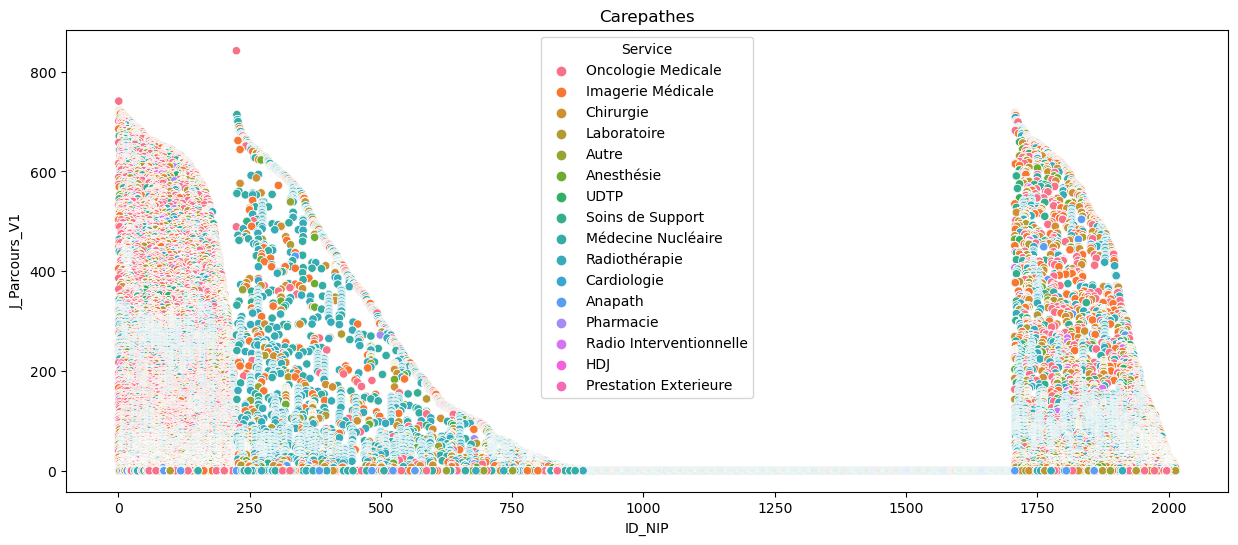

In [1]:
def plot_Complete_carepath_clustered (myouputpath, mlflow, mlflowname):
    import my_custom_func_TS_Clust_1 as Mcftsc
    import Sql_Alchemy_Classes as AlSQL
    import matplotlib.pyplot as plt

    Requete="""SELECT Table_Acte.[NIP]  
                ,Table_Cluster.Cl_P as Clust  
                ,Table_Cluster.X_abscisse   
                ,Table_Acte.[J_Parcours_V1]  
                ,Table_Acte.[J_Parcours_V3]   
                ,Table_Acte.[Service] 
                ,Table_Acte.[Activite]   
                ,Table_Acte.[Phase]   
                ,Table_Acte.[Dimension]   
                ,Table_Acte.[Type_seq]  
                
                FROM [ICO_Activite].[dbo].[Tmp_Carac_Actes] as Table_Acte
                , [ICO_Activite].[dbo].[Mlflow_Exp_NIP_Cl_P1_CPP] as Table_Cluster
                WHERE Table_Cluster.NIP = Table_Acte.NIP
                ORDER BY Clust asc ,Table_Acte.[J_Parcours_V1] desc, Table_Acte.[NIP]
    """

    df_Actes_graph=AlSQL.AlSQL_Requete(AlSQL.engine,Requete,'No')
    Mcftsc.plot_carepath(df_Actes_graph,None,None,None)

    plt.savefig(myouputpath + mlflowname + '.png')
    mlflow.log_artifact(myouputpath + mlflowname + '.png', 'Plots')

    return